<a href="https://colab.research.google.com/github/PHAMDANGKIEUOANH/Sales-data/blob/main/Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Sales Analyst in an E-com business (Task: Conduct an Anual Report)
# Question : WHAT IS THE BEST MONTH FOR SALES?
#          : HOW MUCH WAS EARNED THAT MONTH?
#          : WHAT CITY HAS THE BEST SALES?
#          : WHAT TIME SHOULD WE DISPLAY ADS TO MAXIMIZE THE LIKELIHOOD OF CUSTOMER'S BUYING PRODUCT?
#          : WHAT PRODUCTS ARE MOST OFTEN SOLD TOGETHER?
#          : WHAT PRODUCT SOLD THE MOST?
#          : WHY DO YOU THINK IT SOLD THE MOST?

Hiện tại thư mục của chúng ta đang chứa dữ liệu của cả 12 tháng. Ta nên gộp nó lại thành 1 file lớn thay vì ngồi phân tích từng file.

In [ ]:
import pandas as pd

# Liệt kê tất cả các tệp csv trong thư mục
import os
files = os.listdir('/content/drive/MyDrive/Colab/drive-download-20230424T171639Z-001')
csv_files = [f for f in files if f.endswith('.csv')]

# Đọc từng tệp csv và nối chúng thành một DataFrame
df = pd.concat([pd.read_csv('/content/drive/MyDrive/Colab/drive-download-20230424T171639Z-001/' + f) for f in csv_files])

# In ra DataFrame
print(df)


      Order ID                     Product Quantity Ordered Price Each  \
0       236670            Wired Headphones                2      11.99   
1       236671  Bose SoundSport Headphones                1      99.99   
2       236672                      iPhone                1      700.0   
3       236673       AA Batteries (4-pack)                2       3.84   
4       236674       AA Batteries (4-pack)                2       3.84   
...        ...                         ...              ...        ...   
20374   278792       AA Batteries (4-pack)                1       3.84   
20375   278793            Wired Headphones                1      11.99   
20376   278794       AA Batteries (4-pack)                1       3.84   
20377   278795                      iPhone                1        700   
20378   278796            Wired Headphones                1      11.99   

           Order Date                         Purchase Address  
0      08/31/19 22:21         359 Spruce St, S

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"


In [ ]:
print(df.shape[0])

186850


In [ ]:
import pandas as pd

# Load dữ liệu vào dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab/annualSales2019.csv')

# Chuyển đổi kiểu dữ liệu của cột "Order Date" sang datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Thêm cột "Month" để lưu giữ thông tin về tháng từ cột "Order Date"
data['Month'] = data['Order Date'].dt.month

data['Month'].unique()
data['Month'].dropna().unique()

# Thêm cột "Sales" để lưu giữ thông tin về số tiền thu được từ mỗi đơn hàng
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data['Price Each'] = pd.to_numeric(data['Price Each'], errors='coerce')
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

# Tính tổng số tiền thu được theo từng tháng
monthly_sales = data.groupby('Month')['Sales'].sum()

# Tìm tháng có doanh thu cao nhất và số tiền thu được trong tháng đó
best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()

print(f"The best month for sales is {best_month} with total sales of ${best_month_sales:,.2f}")


The best month for sales is 12.0 with total sales of $4,613,443.34


WHY: 
Tháng 12 là tháng mua sắm bận rộn nhất trong năm, bao gồm mùa lễ Giáng sinh và đón năm mới, vì vậy người tiêu dùng thường mua nhiều hơn trong tháng này.
Nhiều công ty cũng sử dụng tháng 12 là thời gian cuối năm để hoàn thành các khoản chi phí và đầu tư cuối năm, có thể dẫn đến việc mua sắm và bán hàng tăng lên.
Tháng 12 có thể là thời điểm cuối cùng trong năm mà người dân sử dụng ngân sách cho các chi tiêu cá nhân, có thể gây ra sự gia tăng về mặt tiêu dùng.

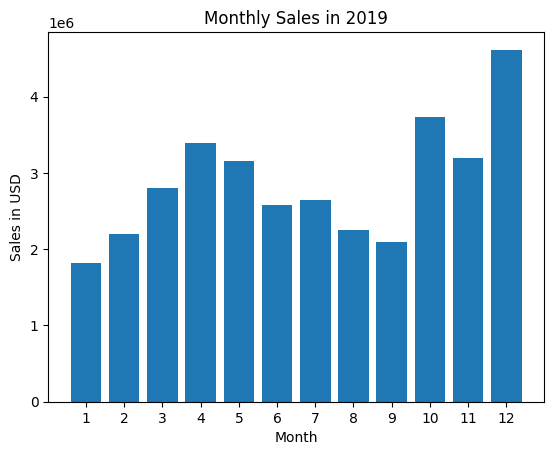

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột
plt.bar(monthly_sales.index, monthly_sales.values)

# Đặt tên cho trục x và trục y
plt.xticks(monthly_sales.index)
plt.xlabel("Month")
plt.ylabel("Sales in USD")


# Đặt tiêu đề cho biểu đồ
plt.title("Monthly Sales in 2019")

# Hiển thị biểu đồ
plt.show()


In [ ]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,0,209921,USB-C Charging Cable,1.0,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6.0,11.95
1,1,209922,Macbook Pro Laptop,1.0,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6.0,1700.00
2,2,209923,ThinkPad Laptop,1.0,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6.0,999.99
3,3,209924,27in FHD Monitor,1.0,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6.0,149.99
4,4,209925,Bose SoundSport Headphones,1.0,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6.0,99.99


In [ ]:
# Tạo các cột mới 'Street' và 'City'
data[['Street', 'City']] = data['Purchase Address'].str.split(',', expand=True)[[0, 1]]

# Tạo cột mới 'State' bằng cách lấy 2 ký tự cuối của cột 'City'
data['State'] = data['City'].str[-2:]

# Tạo cột mới 'Sales' bằng cách tính tổng doanh thu
data['Sales'] = data['Quantity Ordered'] * data['Price Each']


In [ ]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State
0,0,209921,USB-C Charging Cable,1.0,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6.0,11.95,950 Walnut St,Portland,nd
1,1,209922,Macbook Pro Laptop,1.0,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6.0,1700.00,80 4th St,San Francisco,co
2,2,209923,ThinkPad Laptop,1.0,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6.0,999.99,402 Jackson St,Los Angeles,es
3,3,209924,27in FHD Monitor,1.0,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6.0,149.99,560 10th St,Seattle,le
4,4,209925,Bose SoundSport Headphones,1.0,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6.0,99.99,545 2nd St,San Francisco,co


In [ ]:
# Nhóm theo thành phố và tính tổng doanh thu của mỗi thành phố
city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False)

# In ra thành phố có doanh thu cao nhất
print("Thành phố có doanh thu cao nhất là:", city_sales.index[0])

Thành phố có doanh thu cao nhất là:  San Francisco


WHY: 
San Francisco là một thành phố lớn và đông dân, có một nền kinh tế phát triển và nhiều người dân có thu nhập cao, do đó có khả năng mua sắm nhiều hơn.
San Francisco là trung tâm công nghệ lớn, có nhiều công ty công nghệ lớn như Apple, Google, Facebook, Twitter,... có trụ sở tại đây, do đó có nhiều người dân làm việc trong lĩnh vực công nghệ với thu nhập cao, có khả năng mua sắm nhiều hơn.
Các chiến dịch marketing và quảng cáo của công ty tập trung vào San Francisco để tăng doanh số bán hàng.

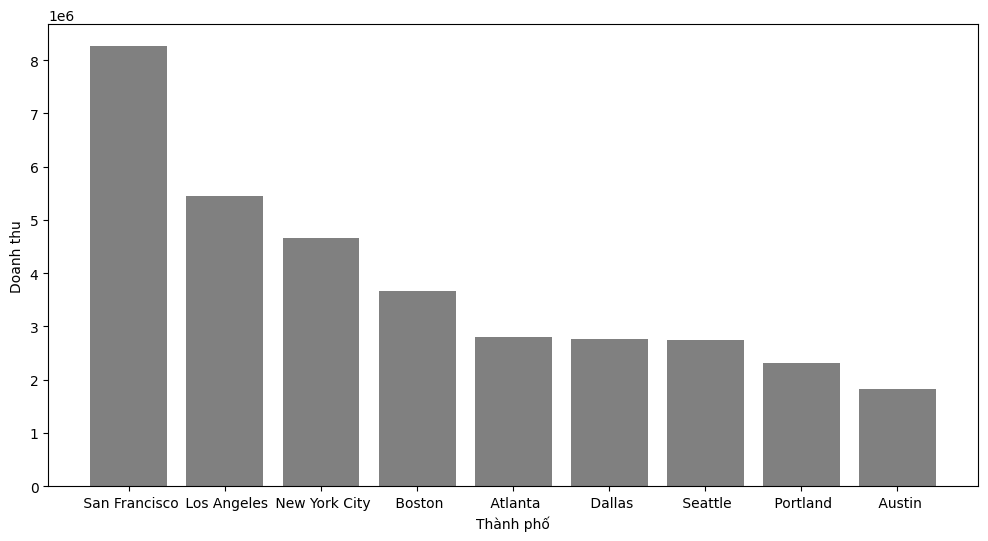

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cột thể hiện doanh thu của các thành phố
plt.figure(figsize=(12,6))
plt.bar(city_sales.index, city_sales.values, color='gray')
plt.xlabel('Thành phố')
plt.ylabel('Doanh thu')
plt.show()

In [ ]:
import folium
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_app")

# Tạo bản đồ với tọa độ trung tâm là Mỹ
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Đặt điểm tương ứng với từng thành phố
for city, sales in city_sales.items():
    folium.Marker(location=[geolocator.geocode(city).latitude, geolocator.geocode(city).longitude], 
                  popup=f"{city}: {sales:.2f} USD").add_to(m)

# Hiển thị bản đồ
m


In [ ]:
import plotly.express as px

# Tạo dataframe từ city_sales
df = pd.DataFrame({'City': city_sales.index, 'Sales': city_sales.values})

# Vẽ biểu đồ cột
fig = px.bar(df, x='City', y='Sales', color='Sales',
             color_continuous_scale='Greys',
             labels={'City': 'Thành phố', 'Sales': 'Doanh thu'})
fig.show()


In [ ]:
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Street,City,State
0,0,209921,USB-C Charging Cable,1.0,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6.0,11.95,950 Walnut St,Portland,nd
1,1,209922,Macbook Pro Laptop,1.0,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6.0,1700.00,80 4th St,San Francisco,co
2,2,209923,ThinkPad Laptop,1.0,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6.0,999.99,402 Jackson St,Los Angeles,es
3,3,209924,27in FHD Monitor,1.0,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6.0,149.99,560 10th St,Seattle,le
4,4,209925,Bose SoundSport Headphones,1.0,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6.0,99.99,545 2nd St,San Francisco,co


In [ ]:
# Tạo cột mới 'Hour' bằng cách lấy giờ từ cột 'Order Date'
data['Hour'] = data['Order Date'].dt.hour

# Nhóm theo giờ và tính số lượng đơn hàng mua vào từng giờ
hour_orders = data.groupby('Hour')['Order ID'].count()

# Vẽ biểu đồ đường thể hiện số lượng đơn hàng mua vào từng giờ trong ngày
import plotly.express as px
fig = px.line(hour_orders, x=hour_orders.index, y=hour_orders.values, title='Số lượng đơn hàng mua vào từng giờ trong ngày')
fig.show()

# Tìm ra khoảng thời gian phổ biến nhất
popular_hours = hour_orders.nlargest(3).index.tolist()
print("Khoảng thời gian phổ biến nhất:", popular_hours)

Khoảng thời gian phổ biến nhất: [19.0, 12.0, 11.0]


WHY: 
Khoảng thời gian 19h-20h: là thời điểm nhiều người kết thúc giờ làm việc và có thể có thời gian đi mua sắm trước khi về nhà.
Khoảng thời gian 12h-13h: là giờ giải lao trưa khi nhiều người có thể ra ngoài ăn trưa và mua sắm đồ ăn hoặc nhu yếu phẩm khác.
Khoảng thời gian 11h-12h: có thể là thời điểm các chương trình khuyến mãi hoặc giảm giá được áp dụng và thu hút nhiều khách hàng mua sắm.
Có thể chạy quảng cáo trước các khung giờ này 30 phút để có hiệu quả

In [ ]:
# Lọc ra các đơn hàng có chung mã đơn hàng
order_data = data[data['Order ID'].duplicated(keep=False)]

# Tạo một cột mới chứa tên sản phẩm
order_data['Grouped'] = order_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Loại bỏ các bản sao của cặp sản phẩm
order_data = order_data[['Order ID', 'Grouped']].drop_duplicates()

# Tính toán tần suất xuất hiện của các cặp sản phẩm
from itertools import combinations
from collections import Counter

count = Counter()

for row in order_data['Grouped']:
    if isinstance(row, str):
        products = row.split(',')
        count.update(Counter(combinations(products, 2)))

# Xác định các cặp sản phẩm thường được bán cùng nhau
most_common = count.most_common(10)

for products, freq in most_common:
    print(f"({products[0]}, {products[1]}) : {freq}")


(Product, Product) : 62835
(iPhone, Lightning Charging Cable) : 1005
(Google Phone, USB-C Charging Cable) : 987
(iPhone, Wired Headphones) : 447
(Google Phone, Wired Headphones) : 414
(Vareebadd Phone, USB-C Charging Cable) : 361
(iPhone, Apple Airpods Headphones) : 360
(Google Phone, Bose SoundSport Headphones) : 220
(USB-C Charging Cable, Wired Headphones) : 160
(Vareebadd Phone, Wired Headphones) : 143


<ipython-input-18-52461c1adaac>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



WHY:
khách hàng mua một chiếc iPhone cũng có thể cần một cáp sạc Lightning để sạc điện thoại và một chiếc tai nghe để nghe nhạc. Tương tự, người mua một chiếc Google Phone cũng có thể cần một chiếc cáp sạc USB-C để sạc điện thoại và một chiếc tai nghe để nghe nhạc.

Thông qua kết quả trên ta có thể tạo gói sản phẩm giảm giá cho các sản phẩm thường được mua cùng nhau hoặc đưa các sản phẩm đó vào cùng một khu vực trong cửa hàng để tăng khả năng khách hàng mua hàng.

In [ ]:
# Nhóm các sản phẩm theo tên và tính tổng số lượng sản phẩm đã bán được
product_sales = data.groupby('Product')['Quantity Ordered'].sum()

# Hiển thị kết quả
print(product_sales)

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
Product                           0.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64


In [ ]:
import plotly.express as px

fig = px.bar(product_sales, x=product_sales.index, y=product_sales.values, title='Tổng số lượng sản phẩm đã bán được')
fig.show()


<ipython-input-21-d0e53b17cf2f>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



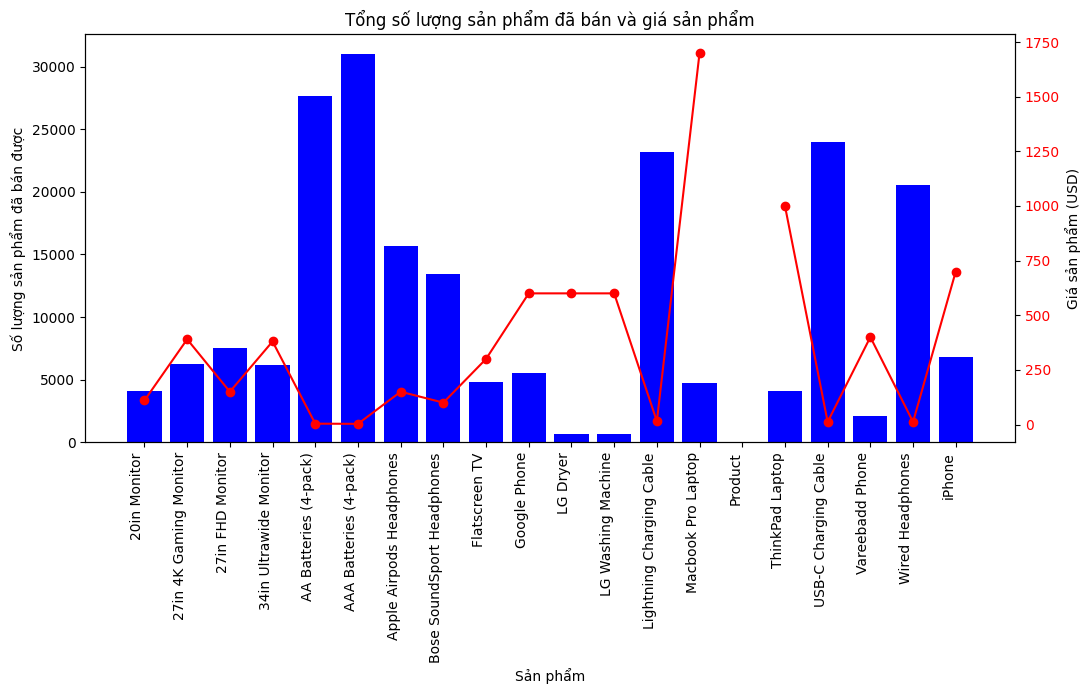

In [ ]:
import matplotlib.pyplot as plt

# Tạo figure và axes
fig, ax1 = plt.subplots(figsize=(12,6))

# Vẽ biểu đồ số lượng sản phẩm đã bán được
ax1.bar(product_sales.index, product_sales.values, color='blue')
ax1.set_xlabel('Sản phẩm')
ax1.set_ylabel('Số lượng sản phẩm đã bán được')
ax1.tick_params(axis='y')

# Tạo axis thứ hai và vẽ biểu đồ giá sản phẩm
ax2 = ax1.twinx()
ax2.plot(product_sales.index, data.groupby('Product')['Price Each'].mean(), color='red', marker='o')
ax2.set_ylabel('Giá sản phẩm (USD)')
ax2.tick_params(axis='y', labelcolor='red')

# Xoay tên các sản phẩm và thay đổi khoảng cách giữa các label
ax1.set_xticklabels(product_sales.index, rotation=90, ha='right')
plt.subplots_adjust(bottom=0.2)

# Hiển thị biểu đồ
plt.title('Tổng số lượng sản phẩm đã bán và giá sản phẩm')
plt.show()



Sản phẩm bán chạy nhất là "AAA Batteries (4-pack)" với số lượng bán là 31,017. Lý do chính là vì giá rât rẻ, tiếp theo là vì đây là một sản phẩm tiêu dùng hàng ngày, rất cần thiết trong cuộc sống. Nó được sử dụng rộng rãi cho các thiết bị như đèn pin, đồ chơi điện tử, remote điều khiển và nhiều thiết bị điện tử khác. Vì vậy, nó là một sản phẩm có nhu cầu cao và được mua nhiều hơn so với các sản phẩm khác trong danh sách.

Thành phố New York và San Francisco đóng góp vào doanh thu của cửa hàng nhiều hơn các thành phố khác. Điều này có thể cho thấy những thành phố này có nhu cầu mua sắm cao và có tiềm năng phát triển kinh tế mạnh mẽ.
Khoảng thời gian từ 11 giờ sáng đến 7 giờ tối là thời điểm mà cửa hàng tiếp nhận nhiều đơn hàng nhất trong ngày. Điều này có thể giúp cửa hàng đưa ra quyết định về việc điều chỉnh thời gian mở cửa, tăng cường nhân sự trong khoảng thời gian này để phục vụ tốt hơn nhu cầu của khách hàng.
Các cặp sản phẩm thường được mua cùng nhau gồm: (iPhone, Lightning Charging Cable), (Google Phone, USB-C Charging Cable), (iPhone, Wired Headphones), (Google Phone, Wired Headphones),... Việc nắm bắt thông tin này có thể giúp cửa hàng hiểu rõ hơn về hành vi mua sắm của khách hàng, từ đó đưa ra các chiến lược marketing nhắm mục tiêu đến những khách hàng có xu hướng mua các sản phẩm này.Như tạo gói sản phẩm giảm giá cho các sản phẩm thường được mua cùng nhau hoặc đưa các sản phẩm đó vào cùng một khu vực trong cửa hàng để tăng khả năng khách hàng mua hàng.